In [1]:
import csv
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import math
from scipy import stats
from collections import Counter, defaultdict
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
from os import listdir
from random import random

# Analysis

- Basic Statistics: Total runners, runners by year, fastest and slowest, best runners
- Interesting: Most repeat runners
- Race time basics: Mean / median and error for male / female, by age group, male time has gotten slower over time by 10mins, but it varies from year to year
- Age statistics: Distribution of ages, distribution of times by age, avg / median age, decreasing trend of age over time, youngest and oldest finishers
- Geography stats: Most from US, but many other countries, most from California but all other states. Most from SF, a lot of the bay area (30-40%) but also LA and other cali cities
- Race based breakdown: Asians are about as fast as average, but Indians are much slower based on some common Indian last names

In [2]:
def read_csv(fname: str) -> List[List[str]]:
	data = []
	with open(fname, 'r') as csvfile:
	    spamreader = csv.reader(csvfile)
	    for row in spamreader:
	    	data.append(row)
	return data

In [3]:
data = read_csv('half_marathon_2008_2021.csv')
df = pd.DataFrame(data[1:], columns=data[0])
Counter(df['Year']), Counter(df[df['Year'] != '2021']['Year']).values()

(Counter({'2008': 8706,
          '2009': 10891,
          '2010': 11898,
          '2011': 10783,
          '2012': 11557,
          '2013': 9130,
          '2014': 11759,
          '2015': 11728,
          '2016': 12025,
          '2017': 12214,
          '2018': 9873,
          '2019': 10277,
          '2021': 5112}),
 dict_values([8706, 10891, 11898, 10783, 11557, 9130, 11759, 11728, 12025, 12214, 9873, 10277]))

In [4]:
np.mean(list(Counter(df[df['Year'] != '2021']['Year']).values()))

10903.416666666666

In [5]:
data_f = read_csv('full_marathon_2008_2021.csv')
dff = pd.DataFrame(data_f[1:], columns=data_f[0])
Counter(dff['Year'])

Counter({'2008': 4450,
         '2009': 5101,
         '2010': 5992,
         '2011': 6040,
         '2012': 6494,
         '2013': 5827,
         '2014': 6624,
         '2015': 6071,
         '2016': 6335,
         '2017': 6586,
         '2018': 5264,
         '2019': 5226,
         '2021': 3185})

In [6]:
np.mean(list(Counter(dff[dff['Year'] != '2021']['Year']).values()))

5834.166666666667

In [7]:
# df[df['Sex'] == 'f'].set_value('Sex', 'F')
df.at[df['Sex'] == 'f', 'Sex'] = 'F'
Counter(df['Sex'])

Counter({'M': 62623, 'F': 73330})

In [8]:
df['Age'] = pd.to_numeric(df['Age'])
df['Time Mins'] = pd.to_numeric(df['Time Mins'])
df['Birth'] = pd.to_numeric(df['Birth'])
dff['Age'] = pd.to_numeric(dff['Age'])
dff['Time Mins'] = pd.to_numeric(dff['Time Mins'])
dff['Birth'] = pd.to_numeric(dff['Birth'])
df.sort_values(by='Time Mins')

,Year,Race,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,...,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
101069,2012,second,1,Jeffrey Eggleston,"Flagstaff, AZ",161,1:03:54,4:53,M 20-29/0,M-27,...,1:03:54,92.70%,63.900000,1985.0,M,27.0,M 20-29,AZ,USA,Flagstaff
93333,2010,second,1,Tyler McCandeless,"State College, PA",58,1:05:02,4:58,M 20-29/0,M-23,...,1:05:02,91.10%,65.033333,1987.0,M,23.0,M 20-29,PA,USA,State College
96800,2011,second,1,Keith Bechtol,"Palo Alto, CA",2,1:05:19,4:59,M 20-29/0,M-26,...,1:05:19,89.41%,65.316667,1985.0,M,26.0,M 20-29,CA,USA,Palo Alto
93334,2010,second,2,Armen Vartanian,"San Mateo, CA",68,1:05:38,5:01,M 30-39/0,M-30,...,1:05:38,90.27%,65.633333,1980.0,M,30.0,M 30-39,CA,USA,San Mateo
96801,2011,second,2,Armen Vartanian,"San Mateo, CA",114,1:05:40,5:01,M 30-39/0,M-31,...,1:05:40,88.93%,65.666667,1980.0,M,31.0,M 30-39,CA,USA,San Mateo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,2008,first,6692,Peter Mercurio,"Redwood City, CA",10402,6:45:38,30:57,M 40-49/614,M-44,...,6:45:38,15.70%,405.633333,1964.0,M,44.0,M 40-49,CA,USA,Redwood City
6692,2008,first,6693,Dinna Gonzales,"Santa Clara, CA",10864,6:46:57,31:03,F 30-39/1273,F-34,...,7:13:30,16.28%,406.950000,1974.0,F,34.0,F 30-39,CA,USA,Santa Clara
73169,2017,first,7551,Victoria Lo,"San Francisco, CA",50788,6:49:21,31:14,F 30-34/713,F-31,...,6:55:01,15.94%,409.350000,1986.0,F,31.0,F 30-34,CA,USA,San Francisco
43089,2013,first,6005,Padmasri Atreya,"San Jose, CA",52938,7:28:17,34:12,F 30-39/1089,F-32,...,8:29:35,14.58%,448.283333,1981.0,F,32.0,F 30-39,CA,USA,San Jose


In [9]:
year = dff[dff['Year'] == '2019']
year.reset_index(drop=True)
len(year[year['Time Mins'] <= 360]), len(year), '{0:0.2f}%'.format(100*len(year[year['Time Mins'] <= 360])/len(year))



(4855, 5226, '92.90%')

In [10]:
# len(dff[dff['Time Mins'] <= 360]), len(dff), '{0:0.2f}%'.format(100*len(dff[dff['Time Mins'] <= 360])/len(dff))
len(df[df['Time Mins'] <= 360]), len(df), '{0:0.2f}%'.format(100*len(df[df['Time Mins'] <= 360])/len(df))


(135944, 135953, '99.99%')

In [11]:
year = df[df['Year'] == '2019']
year.reset_index(drop=True)
len(year[year['Time Mins'] <= 240]), len(year), '{0:0.2f}%'.format(100*len(year[year['Time Mins'] <= 240])/len(year))

(10237, 10277, '99.61%')

In [12]:
df[df['Name'] == 'Armen Vartanian']

,Year,Race,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,...,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
93334,2010,second,2,Armen Vartanian,"San Mateo, CA",68,1:05:38,5:01,M 30-39/0,M-30,...,1:05:38,90.27%,65.633333,1980.0,M,30.0,M 30-39,CA,USA,San Mateo
96801,2011,second,2,Armen Vartanian,"San Mateo, CA",114,1:05:40,5:01,M 30-39/0,M-31,...,1:05:40,88.93%,65.666667,1980.0,M,31.0,M 30-39,CA,USA,San Mateo
108351,2014,second,1,Armen Vartanian,"San Mateo, CA",335,1:07:26,5:09,M 30-39/0,M-34,...,1:07:26,86.82%,67.433333,1980.0,M,34.0,M 30-39,CA,USA,San Mateo


In [15]:
# Most appearances
df['BirthStr'] = df['Birth'].astype(str)
Counter(df['Name'] + df['BirthStr']).most_common(10)

[('Unknown Runner-Reg2011.0', 45),
 ('Manish Subramanian1969.0', 13),
 ('Joanne Babin1964.0', 13),
 ('Alexis Lynch1978.0', 12),
 ('Kay Eckert1962.0', 12),
 ('John Cook1958.0', 12),
 ('Upendran Loganathan1968.0', 12),
 ('Mia Wilson1955.0', 12),
 ('Rachel Levy1985.0', 12),
 ('Michael Nguyen1973.0', 12)]

In [17]:
len(Counter(df['Name'] + df['BirthStr']))

105561

In [23]:
df[df['Name'] == 'Manish Subramanian'].sort_values(by='Year')
df[df['Name'] == 'Ashley Desilva'].sort_values(by='Year')

,Year,Race,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,...,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City,BirthStr
2878,2008,first,2879,Ashley Desilva,"Pacifica, CA",19338,2:11:41,10:03,F 20-29/479,F-22,...,50.00%,131.683333,1986.0,F,22.0,F 20-29,CA,USA,Pacifica,1986.0
9703,2009,first,3011,Ashley Desilva,"Pacifica, CA",21502,2:09:44,9:54,F 20-29/452,F-23,...,50.75%,129.733333,1986.0,F,23.0,F 20-29,CA,USA,Pacifica,1986.0
17869,2010,first,3130,Ashley Desilva,"Pacifica, CA",62301,2:12:06,10:05,F 20-29/484,F-24,...,49.84%,132.100000,1986.0,F,24.0,F 20-29,CA,USA,Pacifica,1986.0
26721,2011,first,3551,Ashley Desilva,"Pacifica, CA",19638,2:22:52,10:54,F 20-29/556,F-25,...,45.64%,142.866667,1986.0,F,25.0,F 20-29,CA,USA,Pacifica,1986.0
32958,2012,first,3274,Ashley Desilva,"Pacifica, CA",33149,2:15:58,10:23,F 20-29/481,F-26,...,48.42%,135.966667,1986.0,F,26.0,F 20-29,CA,USA,Pacifica,1986.0
41584,2013,first,4500,Ashley Desilva,"Pacifica, CA",72330,2:39:04,12:08,F 20-29/747,F-27,...,40.99%,159.066667,1986.0,F,27.0,F 20-29,CA,USA,Pacifica,1986.0
47099,2014,first,4010,Ashley Desilva,"Pacifica, CA",73187,2:27:49,11:17,F 20-29/669,F-28,...,44.11%,147.816667,1986.0,F,28.0,F 20-29,CA,USA,Pacifica,1986.0
54412,2015,first,4066,Ashley Desilva,"Pacifica, CA",53130,2:24:09,11:00,F 20-29/697,F-29,...,45.24%,144.150000,1986.0,F,29.0,F 20-29,CA,USA,Pacifica,1986.0
61111,2016,first,3027,Ashley Desilva,"Pacifica, CA",62836,2:16:51,10:27,F 30-34/247,F-30,...,47.66%,136.850000,1986.0,F,30.0,F 30-34,CA,USA,Pacifica,1986.0
67939,2017,first,2321,Ashley Desilva,"Pacifica, CA",52844,2:11:01,10:00,F 30-34/172,F-31,...,49.82%,131.016667,1986.0,F,31.0,F 30-34,CA,USA,Pacifica,1986.0


In [24]:
df.describe()

,Time Mins,Age
count,135953.000000,135942.000000
mean,141.600866,35.957820
std,28.927302,11.037711
min,63.900000,0.000000
25%,120.950000,28.000000
50%,138.016667,34.000000
75%,158.483333,43.000000
max,484.566667,90.000000


In [25]:
def min_to_time(mins: int) -> str:
    td = timedelta(hours=math.floor(mins/60), minutes=math.floor(mins%60), seconds=round(60*(mins%1)))
    return str(td)
print(f'Total: {len(df)}')
time_mins = df['Time Mins']
print(f'Median: {min_to_time(np.median(time_mins))}')
print(f'Mean: {min_to_time(np.mean(time_mins))} +- {min_to_time(2.576*np.std(time_mins)/math.sqrt(len(time_mins)))}')
print(f'Min: {min_to_time(np.min(time_mins))}')
print(f'Max: {min_to_time(np.max(time_mins))}')

Total: 135953
Median: 2:18:01
Mean: 2:21:36 +- 0:00:12
Min: 1:03:54
Max: 8:04:34


In [26]:
male = df[df['Sex']=='M']['Time Mins']
print(f'Num (M): {len(male)}')
print(f'Mean (M): {min_to_time(male.mean())} +- {min_to_time(2.576*male.std()/math.sqrt(len(male)))}')
print(f'Median (M): {min_to_time(male.median())}')
print(f'Extremes (M): {min_to_time(male.min())}\t{min_to_time(male.max())}')
maleage = df[df['Sex']=='M'][df['Age']>1]['Age']
print(f'Mean Age (M): {maleage.mean()}')
print(f'Median Age (M): {maleage.median()}')
print(f'Extremes Age (M): {maleage.min()}\t{maleage.max()}')
print()
female = df[df['Sex']=='F']['Time Mins']
print(f'Num (F): {len(female)}')
print(f'Mean (F): {min_to_time(female.mean())} +- {min_to_time(2.576*female.std()/math.sqrt(len(female)))}')
print(f'Median (F): {min_to_time(female.median())}')
print(f'Extremes (F): {min_to_time(female.min())}\t{min_to_time(female.max())}')
femaleage = df[df['Sex']=='F'][df['Age']>1]['Age']
print(f'Mean Age (F): {femaleage.mean()}')
print(f'Median Age (F): {femaleage.median()}')
print(f'Extremes Age (F): {femaleage.min()}\t{femaleage.max()}')


Num (M): 62623
Mean (M): 2:13:55 +- 0:00:17
Median (M): 2:10:03
Extremes (M): 1:03:54	8:04:34
Mean Age (M): 36.96594134342479
Median Age (M): 35.0
Extremes Age (M): 7.0	90.0

Num (F): 73330
Mean (F): 2:28:10 +- 0:00:16
Median (F): 2:24:25
Extremes (F): 1:10:45	7:28:17


/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


Mean Age (F): 35.3019066493542
Median Age (F): 33.0
Extremes Age (F): 8.0	83.0


In [27]:
for category in sorted(Counter(df['Category'])):
    if category == 'F Elite':
        continue
    cat_data = df[df['Category'] == category]['Time Mins']
    print(f'Num {category}: {len(cat_data)}\t{min_to_time(cat_data.mean())} +- {min_to_time(2.576*cat_data.std()/math.sqrt(len(cat_data)))}')


Num F 01-19: 1643	2:24:47 +- 0:01:47
Num F 20-24: 3086	2:19:20 +- 0:01:08
Num F 20-29: 15330	2:22:15 +- 0:00:31
Num F 25-29: 5915	2:24:46 +- 0:00:55
Num F 30-34: 4720	2:27:19 +- 0:01:04
Num F 30-39: 16537	2:25:54 +- 0:00:32
Num F 35-39: 3404	2:30:53 +- 0:01:15
Num F 40-44: 2561	2:32:15 +- 0:01:28
Num F 40-49: 9394	2:30:35 +- 0:00:45
Num F 45-49: 2132	2:36:10 +- 0:01:36
Num F 50-54: 1487	2:38:45 +- 0:02:01
Num F 50-59: 4318	2:39:51 +- 0:01:09
Num F 55-59: 911	2:40:47 +- 0:02:39
Num F 60-64: 432	2:49:40 +- 0:04:04
Num F 60-69: 968	2:55:06 +- 0:02:38
Num F 65-69: 156	2:58:46 +- 0:07:22
Num F 70-74: 15	3:21:20 +- 0:20:14
Num F 70-99: 152	3:12:27 +- 0:06:56
Num F 75-79: 5	3:14:40 +- 0:30:15
Num F NoAge: 163	2:29:07 +- 0:04:54
Num M 01-19: 1430	2:08:43 +- 0:02:09
Num M 20-24: 2063	2:06:34 +- 0:01:29
Num M 20-29: 9640	2:08:13 +- 0:00:41
Num M 25-29: 4886	2:11:45 +- 0:01:02
Num M 30-34: 4777	2:14:12 +- 0:01:04
Num M 30-39: 13765	2:11:31 +- 0:00:35
Num M 35-39: 3427	2:15:54 +- 0:01:16
Num M 40-

All Female: 26,467
- Num F 01-19: 1643	2:24:47 +- 0:01:47
 - Num F 20-24: 3086	2:19:20 +- 0:01:08
 - Num F 25-29: 5915	2:24:46 +- 0:00:55
 - Num F 30-34: 4720	2:27:19 +- 0:01:04
 - Num F 35-39: 3404	2:30:53 +- 0:01:15
 - Num F 40-44: 2561	2:32:15 +- 0:01:28
 - Num F 45-49: 2132	2:36:10 +- 0:01:36
 - Num F 50-54: 1487	2:38:45 +- 0:02:01
 - Num F 55-59: 911	2:40:47 +- 0:02:39
 - Num F 60-64: 432	2:49:40 +- 0:04:04
 - Num F 65-69: 156	2:58:46 +- 0:07:22
 - Num F 70-74: 15	3:21:20 +- 0:20:14
 - Num F 75-79: 5	3:14:40 +- 0:30:15
All Female: 46,699
 - Num F 20-29: 15330	2:22:15 +- 0:00:31
 - Num F 30-39: 16537	2:25:54 +- 0:00:32
 - Num F 40-49: 9394	2:30:35 +- 0:00:45
 - Num F 50-59: 4318	2:39:51 +- 0:01:09
 - Num F 60-69: 968	2:55:06 +- 0:02:38
 - Num F 70-99: 152	3:12:27 +- 0:06:56


All Male: 24,755
 - Num M 01-19: 1430	2:08:43 +- 0:02:09
 - Num M 20-24: 2063	2:06:34 +- 0:01:29
 - Num M 25-29: 4886	2:11:45 +- 0:01:02
 - Num M 30-34: 4777	2:14:12 +- 0:01:04
 - Num M 35-39: 3427	2:15:54 +- 0:01:16
 - Num M 40-44: 2670	2:18:08 +- 0:01:24
 - Num M 45-49: 2125	2:20:17 +- 0:01:38
 - Num M 50-54: 1499	2:20:56 +- 0:01:54
 - Num M 55-59: 1005	2:22:08 +- 0:02:13
 - Num M 60-64: 586	2:28:02 +- 0:03:11
 - Num M 65-69: 245	2:36:35 +- 0:05:13
 - Num M 70-74: 33	2:44:33 +- 0:12:40
 - Num M 75-79: 6	2:50:43 +- 0:27:30
 - Num M 80-99: 3	3:24:18 +- 1:21:46

All Male: 37,612
 - Num M 20-29: 9640	2:08:13 +- 0:00:41
 - Num M 30-39: 13765	2:11:31 +- 0:00:35
 - Num M 40-49: 8353	2:13:31 +- 0:00:44
 - Num M 50-59: 4142	2:18:49 +- 0:01:04
 - Num M 60-69: 1403	2:30:20 +- 0:01:58
 - Num M 70-99: 309	2:51:59 +- 0:05:17
 

Text(105.0, 0, 'debarghyadas.com')

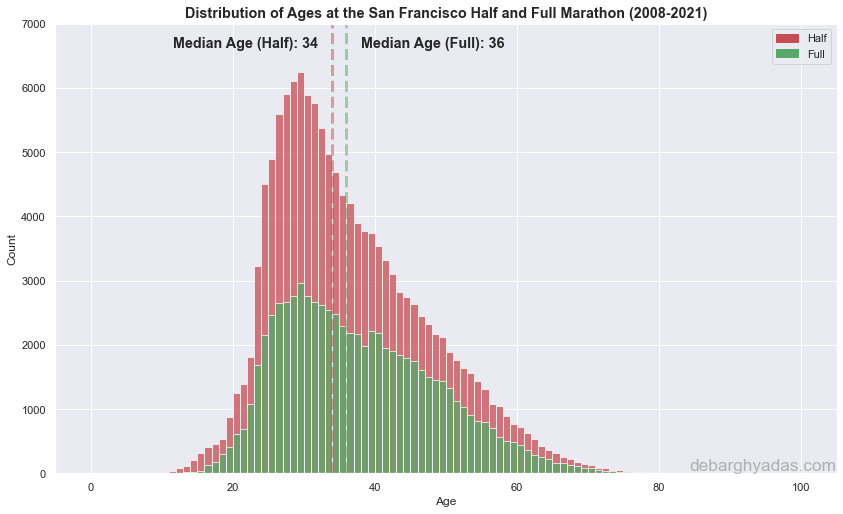

In [105]:
plt.title('Distribution of Ages at the San Francisco Half and Full Marathon (2008-2021)', fontweight='heavy', 
         fontsize='large')
agehalf = sns.histplot(df[df['Age'] != 0]['Age'], color=sns.color_palette()[3], binwidth=1, binrange=[0, 100], legend=True, label='Half')

agehalfmedian = df[df['Age'] != 0]['Age'].median()
plt.plot([agehalfmedian,agehalfmedian], [0, 10000], color=sns.color_palette()[3], lw='3', alpha=0.5, linestyle='dashed')
plt.text(agehalfmedian - 2, ymax - 200, f'Median Age (Half): {agehalfmedian:0.0f}', horizontalalignment='right',
         verticalalignment='top',
         fontsize='large', fontweight='bold')

agefull = sns.histplot(dff[dff['Age'] != 0]['Age'], color=sns.color_palette()[2], binwidth=1, binrange=[0, 100], legend=True, label='Full')

agefullmedian = dff[dff['Age'] != 0]['Age'].median()
plt.plot([agefullmedian,agefullmedian], [0, 10000], color=sns.color_palette()[2], lw='3', alpha=0.5, linestyle='dashed')
plt.text(agefullmedian + 2, ymax - 200, f'Median Age (Full): {agefullmedian:0.0f}', horizontalalignment='left',
         verticalalignment='top',
         fontsize='large', fontweight='bold')


plt.ylim([0, 7000])
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color=sns.color_palette()[3], label='Half')
green_patch = mpatches.Patch(color=sns.color_palette()[2], label='Full')
plt.legend(handles=[red_patch, green_patch])

xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmax, 0, 'debarghyadas.com', fontsize='x-large', alpha=0.3, horizontalalignment='right', verticalalignment='bottom')




In [113]:
len(df[df['Age']>=50]) / len(df), len(df[df['Age']<50][df['Age']>= 30]) / len(df), len(df[df['Age']<30]) / len(df)

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(0.13000816458629086, 0.5433201179819497, 0.3265908071171655)

In [115]:
len(dff[dff['Age']>=50]) / len(dff), len(dff[dff['Age']<50][dff['Age']>= 30]) / len(dff), len(dff[dff['Age']<30]) / len(dff)

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(0.14781064280347017, 0.5646697178769041, 0.2874103422364916)

In [121]:
# oldest
# Male: Sang Mi Kim (90)
# Female: Byungye Kim (83), Dorothy Joy (83)
df[df['Age'] >= 2][df['Sex']=='F'].sort_values(by='Age', ascending=False).head(10)

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Year,Race,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,...,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City,BirthStr
96687,2010,second,3355,Dorothy Joy,"Yucaipa, CA",26233,3:31:41,16:09,F 70-99/4,F-83,...,60.57%,211.683333,1927.0,F,83.0,F 70-99,CA,USA,Yucaipa,1927.0
22831,2010,first,8092,Byungye Kim,"Hacienda Heights, CA",63117,3:15:13,14:54,F 70-99/7,F-83,...,65.68%,195.216667,1927.0,F,83.0,F 70-99,CA,USA,Hacienda Heights,1927.0
14631,2009,first,7939,Regina Tumidajewicz,"Amsterdam, NY",23172,3:41:20,16:53,F 70-99/7,F-82,...,61.36%,221.333333,1927.0,F,82.0,F 70-99,NY,USA,Amsterdam,1927.0
6557,2008,first,6558,Regina Tumidajewicz,"Amsterdam, NY",10588,3:29:10,15:58,F 70-99/3,F-81,...,58.02%,209.166667,1927.0,F,81.0,F 70-99,NY,USA,Amsterdam,1927.0
23132,2010,first,8393,Mary Waldo,"San Mateo, CA",73452,3:50:00,17:33,F 70-99/9,F-77,...,48.64%,230.000000,1933.0,F,77.0,F 70-99,CA,USA,San Mateo,1933.0
125944,2017,second,4611,Ellen Wright-Montgomery,"Half Moon Bay, CA",95938,3:45:20,17:12,F 70-99/6,F-77,...,48.70%,225.333333,1940.0,F,77.0,F 70-99,CA,USA,Half Moon Bay,1940.0
108308,2013,second,3083,Jeanette Fowler,"Portola Valley, CA",55429,3:34:15,16:21,F 70-99/4,F-77,...,51.22%,214.250000,1936.0,F,77.0,F 70-99,CA,USA,Portola Valley,1936.0
133934,2019,second,4108,Robin Brown,"Penngrove, CA",23097,3:13:56,14:48,F 75-79/1,F-77,...,56.59%,193.933333,1942.0,F,77.0,F 75-79,CA,USA,Penngrove,1942.0
57948,2015,first,7602,Frances Gilbert,"Cincinnati, OH",82556,3:33:25,16:17,F 70-99/14,F-77,...,51.42%,213.416667,1938.0,F,77.0,F 70-99,OH,USA,Cincinnati,1938.0
71942,2017,first,6324,Carol Pechler,"Menlo Park, CA",42492,2:55:15,13:23,F 70-99/5,F-77,...,62.62%,175.250000,1940.0,F,77.0,F 70-99,CA,USA,Menlo Park,1940.0


In [31]:
# Youngest
# Female: Sophie Russell (8)
# Male: Christian Ho (7)
df[df['Age'] >= 2].sort_values(by='Age', ascending=True).head(10)

,Year,Race,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,...,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City,BirthStr
36684,2012,first,7001,Christian Ho,"Winchester, CA",1373,3:06:14,14:13,M 01-19/86,M-7,...,44.71%,186.233333,2005.0,M,7.0,M 01-19,CA,USA,Winchester,2005.0
106812,2013,second,1587,Kai Charp,"Albany, CA",35085,2:11:02,10:00,M 01-19/13,M-8,...,58.97%,131.033333,2005.0,M,8.0,M 01-19,CA,USA,Albany,2005.0
57610,2015,first,7264,Kai Hargett,"Ventura, CA",72010,3:10:03,14:30,M 01-19/95,M-8,...,40.66%,190.050000,2007.0,M,8.0,M 01-19,CA,USA,Ventura,2007.0
120886,2016,second,4044,Hunter Smith,"Orange, CA",486,2:59:17,13:41,M 01-19/37,M-8,...,43.10%,179.283333,2008.0,M,8.0,M 01-19,CA,USA,Orange,2008.0
90164,2008,second,1690,Dylan Tovani,"Oakley, CA",23736,2:43:59,12:31,M 01-19/20,M-8,...,48.47%,163.983333,2000.0,M,8.0,M 01-19,CA,USA,Oakley,2000.0
49572,2014,first,6483,Sophie Russell,"Austin, TX",82398,3:01:17,13:50,F 01-19/88,F-8,...,50.11%,181.283333,2006.0,F,8.0,F 01-19,TX,USA,Austin,2006.0
43084,2013,first,6000,Anav Mehta,"San Jose, CA",52962,4:54:33,22:29,M 01-19/50,M-8,...,26.23%,294.550000,2005.0,M,8.0,M 01-19,CA,USA,San Jose,2005.0
57734,2015,first,7388,Logan Bodi,"Santa Cruz, CA",42357,3:16:01,14:58,M 01-19/97,M-9,...,37.35%,196.016667,2006.0,M,9.0,M 01-19,CA,USA,Santa Cruz,2006.0
22401,2010,first,7662,Jonathan Kleffel,"Redlands, CA",83470,2:59:25,13:42,M 01-19/78,M-9,...,42.48%,179.416667,2001.0,M,9.0,M 01-19,CA,USA,Redlands,2001.0
79176,2018,first,6007,Riley Yarnall,"Loma Linda, CA",18558,3:52:33,17:45,M 01-19/86,M-9,...,31.48%,232.550000,2009.0,M,9.0,M 01-19,CA,USA,Loma Linda,2009.0


In [32]:
len(Counter(df[df['Country'] == 'USA']['State']).most_common())

75

In [33]:
Counter(df[df['Country'] == 'USA'][df['State'] == 'CA']['City']).most_common(50)

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[('San Francisco', 31747),
 ('San Jose', 5533),
 ('Oakland', 3218),
 ('Sunnyvale', 2552),
 ('Los Angeles', 2251),
 ('Berkeley', 2145),
 ('Fremont', 2017),
 ('Mountain View', 1839),
 ('San Mateo', 1649),
 ('Santa Clara', 1502),
 ('Palo Alto', 1330),
 ('Sacramento', 1232),
 ('San Diego', 1138),
 ('Walnut Creek', 977),
 ('San Ramon', 977),
 ('Redwood City', 975),
 ('Cupertino', 957),
 ('Daly City', 929),
 ('Long Beach', 814),
 ('Menlo Park', 734),
 ('Dublin', 706),
 ('Alameda', 702),
 ('Pleasanton', 690),
 ('Milpitas', 669),
 ('Burlingame', 644),
 ('Danville', 638),
 ('Irvine', 602),
 ('Hayward', 570),
 ('South San Francisco', 568),
 ('Fresno', 495),
 ('Foster City', 492),
 ('Concord', 480),
 ('Los Altos', 462),
 ('Huntington Beach', 450),
 ('San Rafael', 446),
 ('Campbell', 412),
 ('Emeryville', 404),
 ('San Bruno', 393),
 ('Los Gatos', 389),
 ('Santa Rosa', 387),
 ('San Carlos', 387),
 ('Mill Valley', 383),
 ('Union City', 376),
 ('Davis', 374),
 ('Pasadena', 370),
 ('San Leandro', 365)

<AxesSubplot:xlabel='Age', ylabel='Count'>

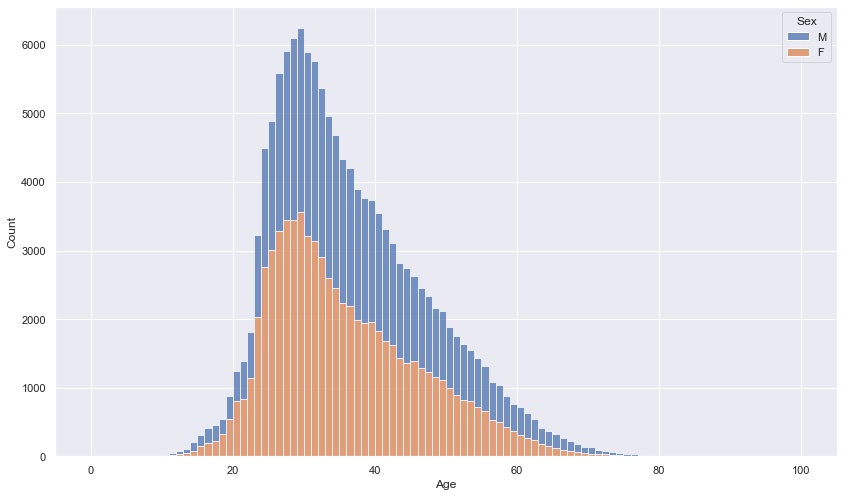

In [34]:

sns.set(rc={'figure.figsize':(14,8.27)})
sns.histplot(df[df['Age'] >= 10], hue="Sex", x="Age", multiple='stack', stat='count', binwidth=1, binrange=[0,100])


Text(51.0, 0, 'Total: 135953')

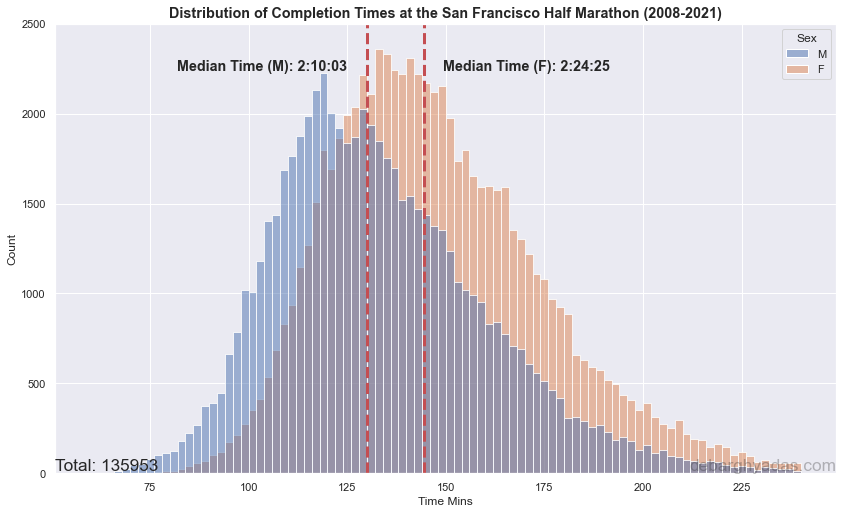

In [46]:
# sns.histplot(df[df['Age'] >= 10], hue="Sex", x="Time Mins", multiple='layer', stat='count', binwidth=2, binrange=[60,240])
# plt.title('')
sns.histplot(df[df['Age'] >= 0], hue="Sex", x="Time Mins", multiple='layer',
             stat='count', binwidth=2, binrange=[60,240])
plt.ylim([0, 2500])
median_male = df[df['Sex']=='M']['Time Mins'].median()
plt.plot([median_male,median_male], [0, 10000], 'r--', lw='3')
median_female = df[df['Sex']=='F']['Time Mins'].median()
plt.plot([median_female,median_female], [0, 10000], 'r--', lw='3')
xmin, xmax, ymin, ymax = plt.axis()
plt.title('Distribution of Completion Times at the San Francisco Half Marathon (2008-2021)', fontweight='heavy', 
         fontsize='large')
plt.text(median_female + 5, ymax - 200, f'Median Time (F): {min_to_time(median_female)}', horizontalalignment='left',
         verticalalignment='top',
         fontsize='large', fontweight='bold')
plt.text(median_male - 5, ymax - 200, f'Median Time (M): {min_to_time(median_male)}', horizontalalignment='right',
         verticalalignment='top',
         fontsize='large', fontweight='bold')
plt.text(xmax, 0, 'debarghyadas.com', fontsize='x-large', alpha=0.3, horizontalalignment='right', verticalalignment='bottom')
plt.text(xmin, 0, f'Total: {len(df)}', fontsize='x-large', horizontalalignment='left', verticalalignment='bottom')

<AxesSubplot:xlabel='Time Mins', ylabel='Count'>

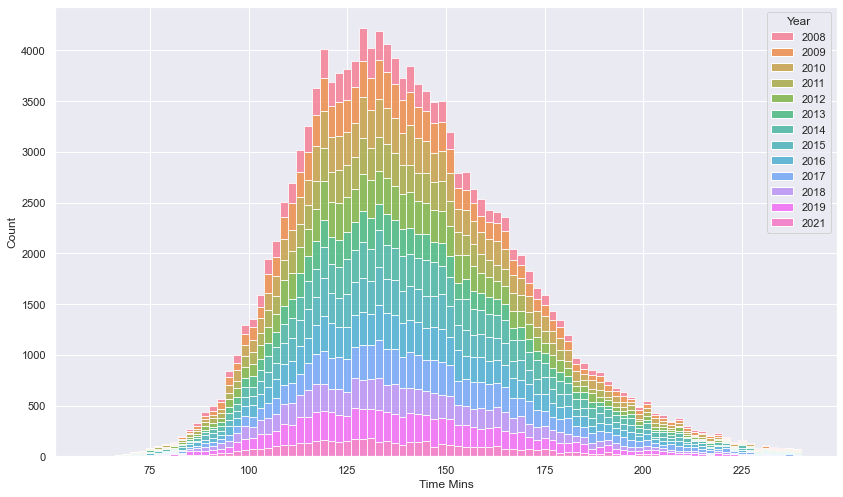

In [20]:
sns.histplot(df[df['Age'] >= 10], hue="Year", x="Time Mins", multiple='stack', stat='count', binwidth=2, binrange=[60,240])


In [ ]:
names = df['Name']

In [ ]:
Counter([n.split()[0] for n in names]).most_common(10)

In [ ]:
Counter([n.split()[-1] for n in names]).most_common(30)

In [ ]:
origtrie = {}
for name in df[df['Sex'] == 'M']['Name']:
    name = name.split()[0]
    trie = origtrie
    for letter in name:
        if not letter in trie:
            trie[letter] = [0, {}]
        trie[letter][0] += 1
        trie = trie[letter][1]
    if not '\n' in trie:
        trie['\n'] = [0, {}]
    trie['\n'][0] += 1


In [ ]:
[(key, origtrie[key][0]) for key in origtrie.keys()]

In [ ]:
def generate():
    name = ''
    trie = origtrie
    while len(trie) > 0:
        choices = [(key, trie[key][0]) for key in trie.keys()]
        total = sum([x[1] for x in choices])
        r = random()
#         print(r)
        nxt = r*total
#         print(nxt)
        i = 0
        while nxt > 0:
            nxt -= choices[i][1]
            i += 1
        name += choices[i-1][0]
        trie = trie[choices[i-1][0]][1]
    return name.strip()
for x in range(10):
    name = generate()
    print(name, len(df[df['Name'] == name]))

In [ ]:
def next(prefix):
    trie = origtrie
    for letter in prefix:
        trie = trie[letter][1]
    prefix = ''
    choices = [(key, trie[key][0]) for key in trie.keys()]
    while len(choices) == 1:
        prefix += choices[0][0]
        trie = trie[choices[0][0]][1]
        choices = [(key, trie[key][0]) for key in trie.keys()]
    if len(choices)== 0:
        print(prefix)
        return
    total = sum([x[1] for x in choices])
    choices.sort(key=lambda x: -x[1])
    for c in choices:
        print(f'{prefix + c[0]}\t{c[1]*100/total:0.2f}%')

next('Shanno')

In [ ]:
female = origtrie

In [ ]:
male = origtrie

In [ ]:
choices = [(key, male[key][0]) for key in male.keys()]
total = sum([x[1] for x in choices])
maleprobs = [(x[0], x[1]/total, x[1]) for x in choices]
maleprobs

In [ ]:
choices = [(key, female[key][0]) for key in female.keys()]
total = sum([x[1] for x in choices])
femaleprobs = [(x[0], x[1]/total, x[1]) for x in choices]
femaleprobs

In [ ]:
firstlet = []
for x in femaleprobs:
    male = [y for y in maleprobs if y[0] == x[0]]
    if len(male) == 0:
        continue
    male = male[0]
    firstlet.append((x[0], x[1], male[1], male[1]/x[1]))
firstlet.sort(key=lambda x: -x[3])
print('\n'.join(['\t'.join(map(str, f)) for f in firstlet]))

In [ ]:
Counter([n.split()[-1] for n in names]).most_common(350)[300:]

In [ ]:
asian = ['Lee', 'Nguyen', 'Wong', 'Chen', 'Kim', 'Wang', 'Chan', 'Li', 'Liu', 'Chang', 'Tran', 'Wu', 'Yang', 'Lin',
        'Zhang', 'Yu', 'Ng', 'Cheng', 'Ho', 'Fong', 'Yee', 'Park', 'Le', 'Chu', 'Lam', 'Pham', 'Leung', 'Lau', 'Lim',
        'Lu', 'Tang', 'Ma', 'Xu', 'Hsu', 'Cheung', 'Choi', 'Ngo', 'Chung', 'Sun', 'Tan', 'Chow', 'Huynh', 'Chin', 'Han', 
        'Zhou', 'Tam', 'Truong', 'Lai', 'Hu', 'Cho', 'Hwang', 'Woo', 'Shen', 'Tong', 'Hong', 'Chiu', 'Ly', 'Dang',
        'Kong', 'Zhao', 'Vu', 'Long', 'Tsai', 'Hoang', 'Fung', 'Kang', 'Zhu', 'Chou', 'Chau', 'Kwan', 'Phan', 'Yan',
        'Liang', 'Chong', 'Gee', 'Yip', 'Bui', 'Jiang', 'Lo', 'Cao', 'Duong', 'Fang', 'Jin', 'Lew', 'Su', 'Zheng', 'Fan',
        'Do', 'Yeh', 'Hom', 'Yeung', 'Luo', 'Vo', 'Lang', 'Yi', 'Quan', 'Peng', 'Kwok', 'So', 'Liao', 'Guo', 'Hung',
        'Kuo']
asian_names = [n for n in names if n.split()[-1] in asian]
len(asian_names)


In [ ]:
Counter([n.split()[0] for n in asian_names]).most_common(100)

In [64]:
src = 'Ellison'
# df[df['Name'].str.contains(src)]
dff[dff['Name'].str.contains(src)]

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
19855,2011,4313,Luke Ellison,"San Francisco, CA",12151,4:55:35,11:17,M 40-44/454,M-43,3074,5:59:45,43.76%,295.583333,1968.0,M,43.0,M 40-44,CA,USA,San Francisco
43594,2015,3067,Wendell Ellison,"Kingston, NY",70975,4:35:54,10:32,M 40-44/323,M-43,2303,5:28:05,46.88%,275.900000,1972.0,M,43.0,M 40-44,NY,USA,Kingston
47043,2016,445,John Ellison,"Carmel, CA",20582,3:28:34,7:58,M 50-54/20,M-54,396,3:31:44,68.15%,208.566667,1962.0,M,54.0,M 50-54,CA,USA,Carmel
71392,2021,1383,Zak Ellison,"Merced, CA",1246,4:24:26,10:06,M 30-34/234,M-31,1109,4:27:41,46.50%,264.433333,1990.0,M,31.0,M 30-34,CA,USA,Merced


In [48]:
df[df['Name'].str.contains('Sharva')]

,Year,Race,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,...,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City,BirthStr
76657,2018,first,3488,Sharvanath Pathak,"Sunnyvale, CA",13917,2:26:55,11:13,M 25-29/456,M-27,...,39.74%,146.916667,1991.0,M,27.0,M 25-29,CA,USA,Sunnyvale,1991.0
123181,2017,second,1848,Sharvanath Pathak,"Mountain View, CA",65624,2:10:16,9:57,M 25-29/263,M-26,...,44.82%,130.266667,1991.0,M,26.0,M 25-29,CA,USA,Mountain View,1991.0


In [47]:
df[df['Name'].str.contains('Shivaal')]

,Year,Race,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,...,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City,BirthStr
122210,2017,second,877,Shivaal Roy,"San Jose, CA",65559,1:55:41,8:50,M 20-24/75,M-21,...,50.48%,115.683333,1996.0,M,21.0,M 20-24,CA,USA,San Jose,1996.0


In [ ]:
df[df['Name'].str.contains('')]

In [ ]:
# df[df['Name'].str in asian_names]
asian_names = set(asian_names)
asians = []
for d in data:
    if d[3] in asian_names:
        asians.append(d)
asiansdf = pd.DataFrame(asians, columns=data[0])
asiansdf['Age'] = pd.to_numeric(asiansdf['Age'])
asiansdf['Time Mins'] = pd.to_numeric(asiansdf['Time Mins'])
asiansdf['Birth'] = asiansdf['Birth'].apply(str)

In [ ]:
# Num (F): 62623
# Mean (M): 2:13:55 +- 0:00:17
# Median (M): 2:10:03
# Num (F): 73330
# Mean (F): 2:28:10 +- 0:00:16
# Median (F): 2:24:25
min_to_time(asiansdf[asiansdf['Sex']=='M']['Time Mins'].mean())
min_to_time(asiansdf[asiansdf['Sex']=='M']['Time Mins'].median())

In [ ]:

min_to_time(asiansdf[asiansdf['Sex']=='F']['Time Mins'].mean())
# min_to_time(asiansdf[asiansdf['Sex']=='F']['Time Mins'].median())

In [ ]:
Counter([n.split()[-1] for n in names]).most_common(500)[350:]

In [157]:
indian_last_names = set("Patel, Singh, Shah, Gupta, Kumar, Sharma, Jain, Rao, Subramanian, Mehta, Reddy, Gill, Agarwal, Desai, Srinivasan, Roy, Ray, Agrawal, Joshi, Arora, Mohan, Krishnan, Kulkarni, Nair, Gandhi, Prasad".split(', '))

In [ ]:
indian_names = [n for n in names if n.split()[-1] in indian_last_names]
Counter([n.split()[0] for n in indian_names]).most_common(100)

In [ ]:
# df[df['Name'].str in asian_names]
indians = []
for d in data:
    if d[3] in indian_names:
        indians.append(d)
indf = pd.DataFrame(indians, columns=data[0])
indf['Age'] = pd.to_numeric(indf['Age'])
indf['Time Mins'] = pd.to_numeric(indf['Time Mins'])
indf['Birth'] = indf['Birth'].apply(str)

In [ ]:
print(min_to_time(indf[indf['Sex']=='M']['Time Mins'].mean())) # 2:13:55
print(min_to_time(indf[indf['Sex']=='M']['Time Mins'].median()))

print(min_to_time(indf[indf['Sex']=='F']['Time Mins'].mean())) # 2:28:10
print(min_to_time(indf[indf['Sex']=='F']['Time Mins'].median()))

In [ ]:
indf[indf['Sex']=='M']

In [ ]:
df[df['Name'].str.startswith('Karthik Vegesna')]

In [ ]:
for year in Counter(df['Year']).keys():
    yr_df = df[df['Year']==year]
    yr_df.reset_index(drop=True)
    avg_age_woman = yr_df[df['Sex']=='F']['Age'].median()
    avg_age_man = yr_df[df['Sex']=='M']['Age'].median()
    print(f'Year: {year}, Female Median: {avg_age_woman}, Male Median: {avg_age_man}')

In [ ]:
df[df['Sex']=='M']['Age'].mean(), df[df['Sex']=='M']['Age'].median(), df[df['Sex']=='F']['Age'].mean(), df[df['Sex']=='F']['Age'].median()

In [ ]:
# Male median 35, woman 33, and now 34 and 32 - approaching full marathon. 

In [117]:
men = df[df['Sex'] == 'M']
women = df[df['Sex'] == 'F']
categories = [df,
              men[df['Age'] < 30],
              men[df['Age'] >= 30][df['Age'] < 50],
              men[df['Age'] >= 50],
              women[df['Age'] < 30],
              women[df['Age'] >= 30][df['Age'] < 50],
              women[df['Age'] >= 50],
             ]
headings = ['Percentile', 'Overall', 'M (<30)', 'M (30-50)', 'M (>50)', 'F (<30)', 'F (30-50)', 'F (>50)']
print('|'.join([''] + headings + ['']))
print('|---------------------'.join([''] + ['' for h in headings] + ['']) + '|')
for i in [0, 1, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 99, 100]:
    res = []
    for c in categories:
        percentile = min_to_time(np.percentile(c['Time Mins'], i))
        res.append(percentile)
    vals = '      |     '.join(res)
    print(f'|{100-i}% | {vals} |')


/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_

|Percentile|Overall|M (<30)|M (30-50)|M (>50)|F (<30)|F (30-50)|F (>50)|
|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|
|100% | 1:03:54      |     1:03:54      |     1:05:38      |     1:17:07      |     1:10:45      |     1:15:31      |     1:28:46 |
|99% | 1:27:52      |     1:17:28      |     1:24:32      |     1:33:18      |     1:34:40      |     1:37:56      |     1:47:16 |
|95% | 1:41:13      |     1:31:57      |     1:36:48      |     1:44:13      |     1:46:45      |     1:49:59      |     1:59:08 |
|90% | 1:48:30      |     1:39:03      |     1:43:05      |     1:50:42      |     1:53:19      |     1:56:33      |     2:06:28 |
|80% | 1:57:28      |     1:47:28      |     1:51:18      |     1:59:03      |     2:01:10      |     2:05:15      |     2:15:49 |
|75% | 2:00:57      |     1:50:40      |     1:54:35      |     2:02:40

In [120]:
headings = ['Time', 'Overall', 'M (<30)', 'M (30-50)', 'M (>50)', 'F (<30)', 'F (30-50)', 'F (>50)']
print('|'.join([''] + headings + ['']))
print('|---------------------'.join([''] + ['' for h in headings] + ['']) + '|')
for i in range(60, 210 + 1, 5):
    res = []
    for c in categories:
        percentileof = 100-stats.percentileofscore(c['Time Mins'], i) 
        res.append(f'{percentileof:0.1f}%')
    vals = '   |  '.join(res)
    print(f'|{min_to_time(i)} | {vals} |')

#     percentileof = 100-stats.percentileofscore(df['Time Mins'], i) 
#     print(f'{min_to_time(i)}: {percentileof:0.2f}% Percentile')

|Time|Overall|M (<30)|M (30-50)|M (>50)|F (<30)|F (30-50)|F (>50)|
|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|
|1:00:00 | 100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0% |
|1:05:00 | 100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0% |
|1:10:00 | 100.0%   |  99.8%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0% |
|1:15:00 | 99.9%   |  99.4%   |  99.8%   |  100.0%   |  100.0%   |  100.0%   |  100.0% |
|1:20:00 | 99.7%   |  98.6%   |  99.5%   |  100.0%   |  99.9%   |  100.0%   |  100.0% |
|1:25:00 | 99.3%   |  97.5%   |  98.9%   |  99.8%   |  99.9%   |  99.9%   |  100.0% |
|1:30:00 | 98.7%   |  95.8%   |  97.8%   |  99.4%   |  99.5%   |  99.7%   |  100.0% |
|1:35:00 | 97.6%   |  93.3%   |  96.0%   |  98.6%   |  98.9%   |  99.3%   |  99.9% |
|1:40:00 | 95.6%   |  89

In [126]:
dff[dff['Sex'] == 'F'].sort_values(by='Time Mins', ascending=True).head(10)

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
28086,2013,10,Anna Bretan,"Berkeley, CA",263,2:42:26,6:12,F 25-29/0,F-28,1,2:42:26,83.38%,162.433333,1985.0,F,28.0,F 25-29,CA,USA,Berkeley
21600,2012,18,Devon Crosby-Helms,"San Francisco, CA",2,2:44:02,6:16,F 30-34/0,F-30,1,2:44:02,82.59%,164.033333,1982.0,F,30.0,F 30-34,CA,USA,San Francisco
4467,2009,18,Yoko Shibui,"Minneapolis, MN",12,2:46:34,6:22,F 30-34/0,F-30,1,2:46:34,81.34%,166.566667,1979.0,F,30.0,F 30-34,MN,USA,Minneapolis
64807,2019,24,Nina Zarina,"RU,",125,2:47:01,6:23,F 30-34/1,F-32,1,2:47:01,81.19%,167.016667,1987.0,F,32.0,F 30-34,,RU,n/a
33926,2014,23,Anna Bretan,"Berkeley, CA",2,2:47:52,6:25,F 25-29/0,F-29,1,2:47:52,80.69%,167.866667,1985.0,F,29.0,F 25-29,CA,USA,Berkeley
33933,2014,30,Devon Yanko,"San Anselmo, CA",4,2:49:28,6:28,F 30-34/0,F-32,2,2:49:28,80.01%,169.466667,1982.0,F,32.0,F 30-34,CA,USA,San Anselmo
4470,2009,21,Michele Van Ornum,"Fresno, CA",3286,2:49:34,6:29,F 40-44/0,F-40,2,2:49:34,83.84%,169.566667,1969.0,F,40.0,F 40-44,CA,USA,Fresno
21611,2012,29,Anna Bretan,"Berkeley, CA",62,2:49:34,6:29,F 25-29/0,F-27,2,2:49:34,79.88%,169.566667,1985.0,F,27.0,F 25-29,CA,USA,Berkeley
40551,2015,24,Anna Bretan,"Berkeley, CA",2,2:49:42,6:29,F 30-34/0,F-30,1,2:49:42,79.81%,169.700000,1985.0,F,30.0,F 30-34,CA,USA,Berkeley
46618,2016,20,Tori Tyler,"Oakland, CA",8,2:49:51,6:29,F 25-29/0,F-28,1,2:49:51,79.76%,169.850000,1988.0,F,28.0,F 25-29,CA,USA,Oakland


In [136]:
df[df['Sex'] == 'F'][df['Age'] <= 22].sort_values(by='Time Mins', ascending=True).head(10)

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Year,Race,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,...,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City,BirthStr
96818,2011,second,19,Caroline Kirui,"Auburn, CA",91,1:15:15,5:45,F 20-29/0,F-20,...,87.33%,75.250000,1991.0,F,20.0,F 20-29,CA,USA,Auburn,1991.0
93364,2010,second,32,Michele Meyer,"San Francisco, CA",10,1:22:34,6:18,F Elite/1,F-22,...,79.80%,82.566667,1988.0,F,22.0,F Elite,CA,USA,San Francisco,1988.0
112924,2015,second,72,Bridget Blum,"San Francisco, CA",25967,1:23:16,6:22,F 20-29/1,F-21,...,78.46%,83.266667,1994.0,F,21.0,F 20-29,CA,USA,San Francisco,1994.0
129885,2019,second,59,Mia Matsunami,"Newport Beach, CA",20625,1:23:46,6:24,F 01-19/1,F-18,...,80.30%,83.766667,2001.0,F,18.0,F 01-19,CA,USA,Newport Beach,2001.0
96883,2011,second,84,Rosie Edwards,"United Kingdom,",602,1:25:01,6:30,F 20-29/6,F-22,...,76.71%,85.016667,1989.0,F,22.0,F 20-29,,United Kingdom,n/a,1989.0
108415,2014,second,65,Bridget Blum,"San Francisco, CA",25005,1:25:29,6:32,F 20-29/1,F-20,...,76.87%,85.483333,1994.0,F,20.0,F 20-29,CA,USA,San Francisco,1994.0
121390,2017,second,57,Lara Dorsky,"New York, NY",218,1:25:34,6:32,F 20-24/1,F-22,...,76.21%,85.566667,1995.0,F,22.0,F 20-24,NY,USA,New York,1995.0
126051,2018,second,55,Jenny Xu,"Cupertino, CA",20060,1:25:40,6:33,F 20-24/1,F-21,...,76.26%,85.666667,1997.0,F,21.0,F 20-24,CA,USA,Cupertino,1997.0
112942,2015,second,90,Carey Lyons,"Tacoma, WA",25976,1:25:55,6:34,F 20-29/4,F-22,...,75.90%,85.916667,1993.0,F,22.0,F 20-29,WA,USA,Tacoma,1993.0
126056,2018,second,60,Hannah Ryan,"San Francisco, CA",20087,1:26:04,6:34,F 01-19/1,F-18,...,78.15%,86.066667,2000.0,F,18.0,F 01-19,CA,USA,San Francisco,2000.0


In [163]:
indian_names = []
with open('/Users/deedy/Downloads/names_ultrapruned.txt', 'r') as f:
    indian_names = f.readlines()
indian_names = [x.split()[-1].strip() for x in indian_names]
indian_names[:10]
indian_names = set(indian_names)

In [280]:
blacklist = ['kay', 'ma', 'yan', 'khan', 'sultana', 'jan', 'wai', 'thomas', 'martin', 'yu', 'james', 'le',
            'anthony', 'chan', 'kerr', 'wilson', 'williams', 'dao', 'nava', 'samuel', 'francis', 'valle', 'pak',
            'moses', 'daniel', 'li', 'pa', 'batt', 'rose', 'mora', 'grace', 'joseph', 'lam', 'yasin', 'lu',
            'mata', 'mar', 'duda', 'du', 'ku', 'sha', 'sam', 'sa', 'sr', 'man', 'ban', 'ju', 'chi', 'hai', 'nam', 
            'mende', 'george', 'gill', 'papa', 'name', 'enna', 'charles', 'an', 'john', 'paul', 'jacob', 'abraham', 'es',
            'redd', 'david', 'adam', 'ta', 'je', 'ra', 'san', 'ni', 'see', 'loya', 'natta', 'la', 'sham', 'pera',
            'eddy', 'good', 'been', 'cha', 'ade']
for b in blacklist:
    if b in indian_names:
        indian_names.remove(b)
for w in indian_last_names:
    indian_names.add(w.lower())
indian_names.add('pathak')

In [281]:
import random
# len([df.loc(i) for i in range(len(df)) if 'Name' in df.loc(i) and df.loc(i)['Name'].str.split()[-1].lower() in indian_names])
# df.loc[1]['Name']
i = 0
res = []
for d in df.iterrows():
#     if i > 100:
#         break
    i += 1
    if d[1]['Name'].split()[-1].lower() in indian_names:
        res.append((d[1]['Sex'], d[1]['Age'],d[1]['Name'], d[1]['Time Mins']))

In [282]:
[r for r in res if 'sharva' in r[-2].lower()]

[('M', 27.0, 'Sharvanath Pathak', 146.91666666666666),
 ('M', 26.0, 'Sharvanath Pathak', 130.26666666666668)]

In [283]:
len([r[-1] for r in res if r[0] == 'M']), len([r[-1] for r in res if r[0] == 'F'])

(3819, 2140)

In [284]:
# np.median(res), np.mean(res)
min_to_time(np.median([r[-1] for r in res if r[0] == 'M'])), min_to_time(np.median([r[-1] for r in res if r[0] == 'F']))

('2:23:46', '2:40:57')

In [285]:
[x for x in indian_last_names if not x.lower() in indian_names]

[]

In [286]:
len(df)

135953

In [287]:
Counter([5*(r[1]//5) for r in res]).most_common()

[(25.0, 1465),
 (30.0, 1428),
 (35.0, 1063),
 (40.0, 720),
 (45.0, 436),
 (20.0, 373),
 (50.0, 178),
 (15.0, 98),
 (55.0, 83),
 (10.0, 38),
 (60.0, 34),
 (65.0, 19),
 (0.0, 13),
 (70.0, 5),
 (5.0, 2),
 (75.0, 1),
 (nan, 1),
 (nan, 1),
 (80.0, 1)]

In [288]:
len(df[df['Age'] < 35])/len(df)

0.5229160077379683

In [289]:
import random
# len([df.loc(i) for i in range(len(df)) if 'Name' in df.loc(i) and df.loc(i)['Name'].str.split()[-1].lower() in indian_names])
# df.loc[1]['Name']
i = 0
resfull = []
for d in dff.iterrows():
#     if i > 100:
#         break
    i += 1
    if d[1]['Name'].split()[-1].lower() in indian_names:
        resfull.append((d[1]['Sex'], d[1]['Age'],d[1]['Name'], d[1]['Time Mins']))

In [290]:
len(resfull), len([r[-1] for r in resfull if r[0] == 'M']), len([r[-1] for r in resfull if r[0] == 'F'])

(1737, 1389, 348)

In [292]:
min_to_time(np.median([r[-1] for r in resfull if r[0] == 'M'])), min_to_time(np.median([r[-1] for r in resfull if r[0] == 'F']))

('4:50:38', '5:03:20')